In [49]:
import numpy as np
import functions as f
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [54]:
N = 50
checkerboard = np.ones((N,N))
for i in range(0,N,5):
    for j in range(0,N,5):
        if (i%2==0 and j%2==0) or (i%2!=0 and j%2!=0):
            checkerboard[i:i+5,j:j+5]=-1

checkerboard = np.reshape(checkerboard,(2500))
# Generate once again the Hebbian weights based on the patterns that also include the checkerboard pattern
patterns = f.generate_patterns(50, 2500)
patterns[0,] = checkerboard
hebbian_weights = f.hebbian_weights(patterns)
# Perturb the checkerboard pattern by modifying 1000 of its elements
perturbed_pattern = f.perturb_pattern(patterns[0,],1000)

# Run the dynamical system with the Hebbian weights, both with the synchronous and the
# asynchronous update rule. Use the same maximum number of iterations and convergence
# criterion as before. For the asynchronous update rule, remember not to store all the states,
# but only one every 1000.
hebbian_dyn = f.dynamics(perturbed_pattern, hebbian_weights, 10000)
hebbian_dyn_async = f.dynamics_async(perturbed_pattern, hebbian_weights, 10000,1000)[::1000]


In [55]:
hebbian_dyn = np.array(hebbian_dyn)
hebbian_dyn = hebbian_dyn.reshape(len(hebbian_dyn),50,50)

hebbian_dyn_async = np.array(hebbian_dyn_async)
hebbian_dyn_async = hebbian_dyn_async.reshape(len(hebbian_dyn_async),50,50)

MovieWriter ffmpeg unavailable; using Pillow instead.


MovieWriter ffmpeg unavailable; using Pillow instead.


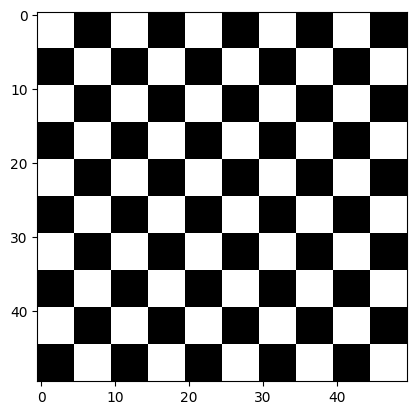

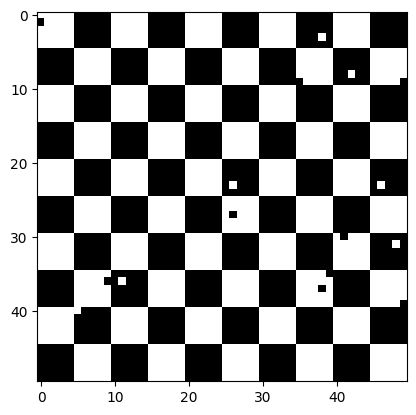

In [56]:
def save_video(state_list, out_path):
    N = len(state_list)
    artist = []
    figure = plt.figure()
    for i in range(N):
        artist.append([plt.imshow(state_list[i], cmap = "Greys")])
    anim = animation.ArtistAnimation(figure, artist)
    anim.save(out_path)
    


save_video(hebbian_dyn, "hebbian_dyn.gif")
save_video(hebbian_dyn_async, "hebbian_dyn_async.gif")